In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import cross_val_score, KFold, learning_curve, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


In [2]:
# Đọc dữ liệu
train_df = pd.read_csv("../feature_engineering/data_train.csv")
test_df = pd.read_csv("../feature_engineering/data_test_final.csv")

X_train = train_df.drop("Phân Loại", axis=1)
y_train = train_df["Phân Loại"]

X_test = test_df.drop("Phân Loại", axis=1)
y_test = test_df["Phân Loại"]


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ADMIN\A

=== Kết quả đánh giá mô hình (K-Fold) ===
           Model  Accuracy  Precision (macro)  Recall (macro)  \
0            MLP  0.758647           0.736797        0.719008   
1  Random Forest  0.891401           0.883344        0.870180   

   F1-score (macro)  
0          0.718684  
1          0.868754  


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


=== So sánh độ đo ===
           Model  Accuracy  Precision    Recall  F1-score
0  MLPClassifier  0.610215   0.615679  0.610215  0.604322
1   RandomForest  0.634409   0.652458  0.634409  0.625653


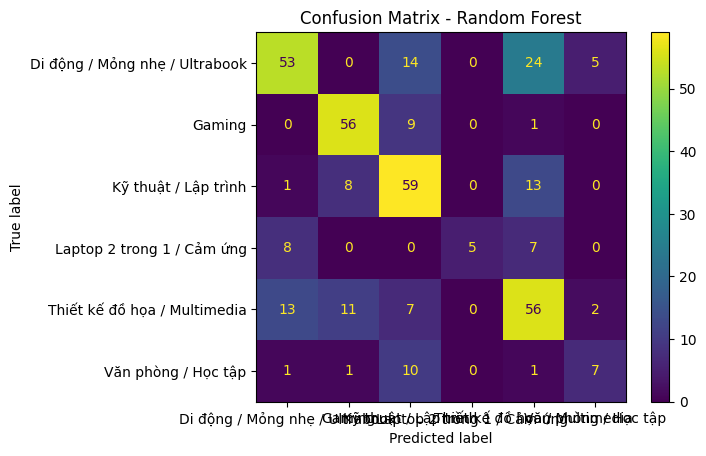

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# MLP và Random Forest với siêu tham số tối ưu
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), activation='logistic', solver='adam', alpha=0.0001, max_iter=500, random_state=42)
rf = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features='sqrt', max_depth=30, bootstrap=False)

# K-Fold Evaluation trên nhiều metric
kf = KFold(n_splits=5, shuffle=True, random_state=42)

metrics = {
    'Accuracy': 'accuracy',
    'Precision (macro)': 'precision_macro',
    'Recall (macro)': 'recall_macro',
    'F1-score (macro)': 'f1_macro'
}

results = []

for model_name, model in [('MLP', mlp), ('Random Forest', rf)]:
    model_result = {'Model': model_name}
    for metric_name, metric in metrics.items():
        score = cross_val_score(model, X_train, y_train, cv=kf, scoring=metric)
        model_result[metric_name] = score.mean()
    results.append(model_result)

# Hiển thị bảng kết quả K-Fold
results_df = pd.DataFrame(results)
print("=== Kết quả đánh giá mô hình (K-Fold) ===")
print(results_df)

# Huấn luyện và đánh giá trên tập test
mlp.fit(X_train, y_train)
rf.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Classification Report
print("\n=== MLP Classifier - Test Set ===")
print(classification_report(y_test, y_pred_mlp))

print("\n=== Random Forest Classifier - Test Set ===")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp)
plt.title("Confusion Matrix - MLP")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title("Confusion Matrix - Random Forest")
plt.show()


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ADMIN\A

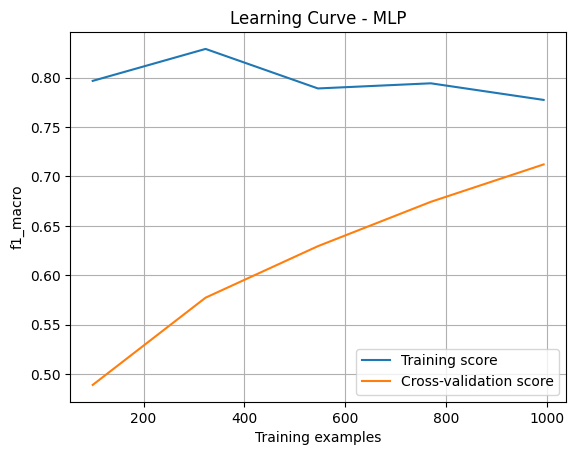

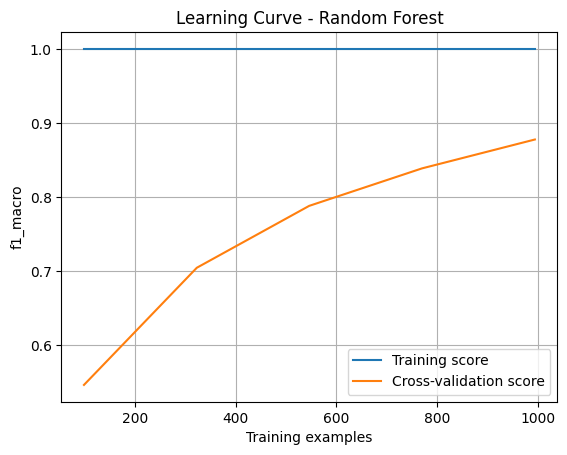

In [4]:
def plot_learning_curve(estimator, title, X, y, cv, scoring="f1_macro"):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label="Training score")
    plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    plt.legend()
    plt.grid()
    plt.show()

plot_learning_curve(mlp, "Learning Curve - MLP", X_train, y_train, kf)
plot_learning_curve(rf, "Learning Curve - Random Forest", X_train, y_train, kf)


=== So sánh mô hình phân cụm ===
           Model  Silhouette Score  Calinski-Harabasz  Davies-Bouldin
0         KMeans          0.317909         562.551211        1.406474
1  Agglomerative          0.311520         666.176938        1.104251


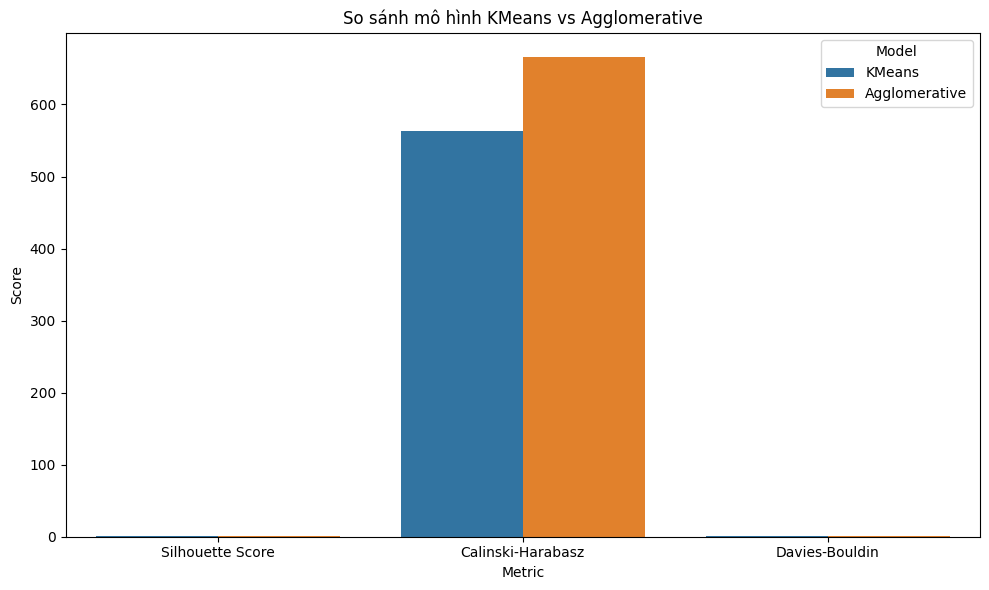

In [5]:
# Phân cụm
kmeans = KMeans(n_clusters=4, random_state=42)
agglo = AgglomerativeClustering(n_clusters=3)

kmeans_labels = kmeans.fit_predict(X_train)
agglo_labels = agglo.fit_predict(X_train)

# Hàm đánh giá clustering
def evaluate_clustering(X, labels, model_name):
    return {
        "Model": model_name,
        "Silhouette Score": silhouette_score(X, labels),
        "Calinski-Harabasz": calinski_harabasz_score(X, labels),
        "Davies-Bouldin": davies_bouldin_score(X, labels)
    }

# Kết quả
results = [
    evaluate_clustering(X_train, kmeans_labels, "KMeans"),
    evaluate_clustering(X_train, agglo_labels, "Agglomerative")
]

import seaborn as sns
results_df = pd.DataFrame(results)
print("=== So sánh mô hình phân cụm ===")
print(results_df)

results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")
plt.figure(figsize=(10, 6))
sns.barplot(data=results_melted, x="Metric", y="Score", hue="Model")
plt.title("So sánh mô hình KMeans vs Agglomerative")
plt.tight_layout()
plt.show()
